## 36.頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

pythonファイルでは、matplotlibが上手く動かないためnotebook使用(原因不明)

### ans35より

In [1]:
with open('./neko.txt.mecab','r') as f:
  text_dict = []
  sentence_dict = []
  # f.read:改行も含めた文字列
  # f.readlines:改行コードを区切って１行ごとに分解されたリスト
  for line in f.readlines():
    if line == '\n':
      continue
    # １文
    elif line != 'EOS\n':
      node = line.split('\t')
      # surfaceが空白の場合除外
      if node[0] == '':
        continue
      # surface 以外はnode[1]
      feature = node[1].split(',')
      word_dict = {
        "surface":node[0],
        "base":feature[6],
        "pos":feature[0],
        "pos1":feature[1]
      }
      sentence_dict.append(word_dict)
    # 追加
    # 追加文が無い場合は除外(elseだと、つまり無い場合も追加したら9210→9964)
    elif len(sentence_dict) != 0:
      text_dict.append(sentence_dict)
      sentence_dict = []

# 35 単語(surface?)とその出現頻度を高い順
import itertools
verb_dict = []
sentence_dict = itertools.chain.from_iterable(text_dict)
# 語彙セット
surface_dict = set()
# 語彙セット(重複あり)
surface = []
# 単語のセット
for sentence in sentence_dict:
  surface_dict.add(sentence['surface'])
  surface.append(sentence['surface'])

# 語彙数
print(f'語彙数：{len(surface_dict)}')


from collections import defaultdict
word_freq = defaultdict(int)

for word in surface:
  word_freq[word] += 1
# 辞書のvalueを基準に 降順にソート
# keyを基準にする場合、hoge = sorted(hoge.items())
word_freq = sorted(word_freq.items(),key = lambda word:word[1],reverse=True)
print(word_freq[:10])

語彙数：13584
[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988)]


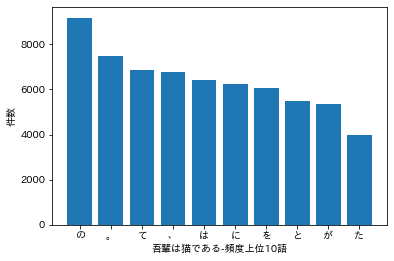

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib
word_top10 = word_freq[:10]
x,y = zip(*word_top10)
plt.bar(x,y)
plt.xlabel('吾輩は猫である-頻度上位10語')
plt.ylabel('件数')
plt.show()